<a href="https://colab.research.google.com/github/Mharishankar1/CodSoft-ML/blob/main/MLTASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
data1 = pd.read_csv('fraudTest.csv')

data2 = pd.read_csv('fraudTrain.csv')

In [ ]:
data = pd.concat([data1, data2], ignore_index=True)

In [ ]:
print("Dataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593361 entries, 0 to 593360
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             593361 non-null  int64  
 1   trans_date_trans_time  593361 non-null  object 
 2   cc_num                 593361 non-null  int64  
 3   merchant               593360 non-null  object 
 4   category               593360 non-null  object 
 5   amt                    593360 non-null  float64
 6   first                  593360 non-null  object 
 7   last                   593360 non-null  object 
 8   gender                 593360 non-null  object 
 9   street                 593360 non-null  object 
 10  city                   593360 non-null  object 
 11  state                  593360 non-null  object 
 12  zip                    593360 non-null  float64
 13  lat                    593360 non-null  float64
 14  long           

In [ ]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
          Unnamed: 0        cc_num            amt            zip  \
count  593361.000000  5.933610e+05  593360.000000  593360.000000   
mean   148345.965980  4.174607e+17      70.187880   48793.677370   
std     85655.120938  1.309214e+18     152.346157   26882.039199   
min         0.000000  3.506043e+07       1.000000    1257.000000   
25%     74170.000000  1.800400e+14       9.640000   26237.000000   
50%    148340.000000  3.520550e+15      47.470000   48174.000000   
75%    222510.000000  4.635331e+15      83.220000   72011.000000   
max    298600.000000  4.992346e+18   17897.240000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  593360.000000  593360.000000  5.933600e+05  5.933600e+05   
mean       38.540574     -90.213768  8.904159e+04  1.354377e+09   
std         5.072699      13.744669  3.017482e+05  2.247766e+07   
min        20.027100    -165.672300  2.300000e+01  1.381500e+04   
25%        34.668900     -96.79

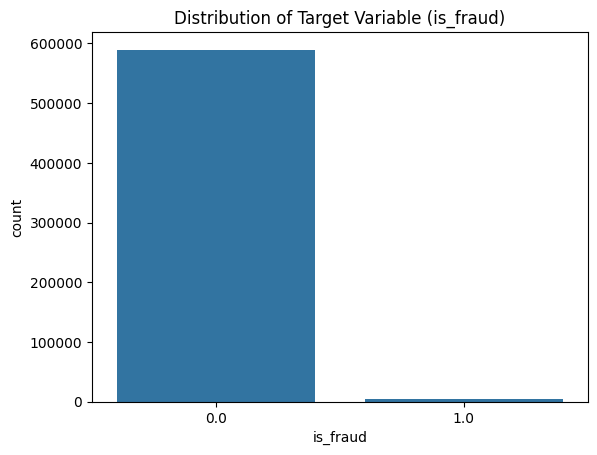

In [ ]:
sns.countplot(x='is_fraud', data=data)
plt.title('Distribution of Target Variable (is_fraud)')
plt.show()

In [ ]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']


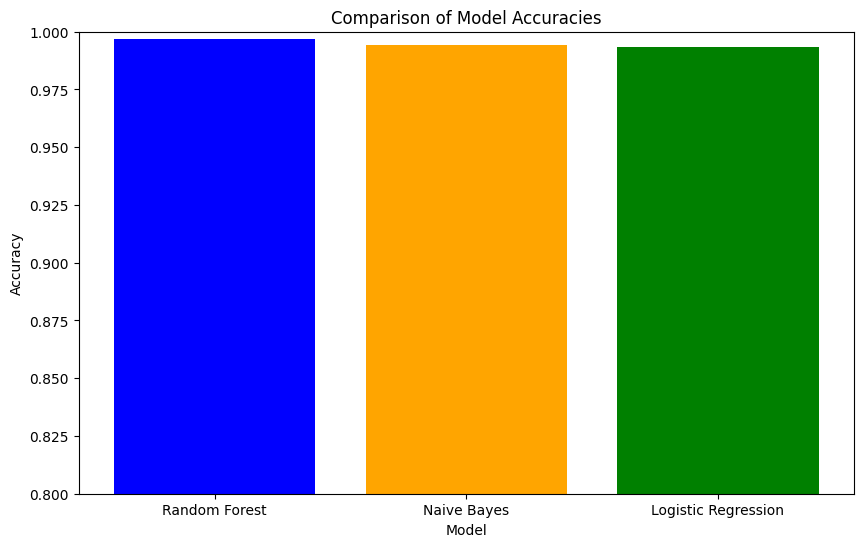

The best model is: Random Forest with accuracy 0.9970


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

rf_model = RandomForestClassifier()
nb_model = GaussianNB()
logreg_model = LogisticRegression()


rf_model.fit(X_train_imputed, y_train)
y_pred_rf = rf_model.predict(X_test_imputed)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

nb_model.fit(X_train_imputed, y_train)
y_pred_nb = nb_model.predict(X_test_imputed)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

scaler = StandardScaler()
X_train_imputed_scaled = scaler.fit_transform(X_train_imputed)
X_test_imputed_scaled = scaler.transform(X_test_imputed)
logreg_model.fit(X_train_imputed_scaled, y_train)
y_pred_logreg = logreg_model.predict(X_test_imputed_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

models = ['Random Forest', 'Naive Bayes', 'Logistic Regression']
accuracies = [accuracy_rf, accuracy_nb, accuracy_logreg]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.8, 1.0)
plt.show()
best_model = models[accuracies.index(max(accuracies))]
print(f"The best model is: {best_model} with accuracy {max(accuracies):.4f}")


In [ ]:

print("Accuracy for Random Forest:", accuracy_rf)

print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("")

print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

print("Accuracy for Naive Bayes:", accuracy_nb)
print("Accuracy for Logistic Regression:", accuracy_logreg)

Accuracy for Random Forest: 0.9969748550626938
Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    117987
         1.0       0.86      0.57      0.68       685

    accuracy                           1.00    118672
   macro avg       0.93      0.78      0.84    118672
weighted avg       1.00      1.00      1.00    118672


Classification Report for Naive Bayes:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    117987
         1.0       0.00      0.00      0.00       685

    accuracy                           0.99    118672
   macro avg       0.50      0.50      0.50    118672
weighted avg       0.99      0.99      0.99    118672


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    117987
         1.0       0.00      0.00      0.00       685

    accuracy                           0.99    118672
   macro avg       0.50      0.50      0.50    118672
weighted avg       0.99      0.99      0.99    118672

Accuracy for Naive Bayes: 0.9942277875151678
Accuracy for Logistic Regression: 0.9934356882836727
